<a href="https://colab.research.google.com/github/Willgnner-Santos/DPE-Legal-Doc-Classification-Pipeline/blob/main/Preprocessing/Anonymize_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


PROCESSO: 9356 anonimizações
NOME: 3498 anonimizações
RUA: 2028 anonimizações
NOME: 687 anonimizações
DOMICILIADAS: 578 anonimizações
ENDEREÇO: 426 anonimizações
PROCESSADO: 173 anonimizações
PROCESSADA: 95 anonimizações
PROTOCOLO: 48 anonimizações
EMAIL: 14 anonimizações
NOME: 5 anonimizações
NOME: 3 anonimizações
NOME: 3 anonimizações
RECONHECIMENTO_FACIAL: 3 anonimizações
SENTENCIADO: 2 anonimizações
NOME: 2 anonimizações
VOZ: 2 anonimizações
SENTENCIADA: 1 anonimizações


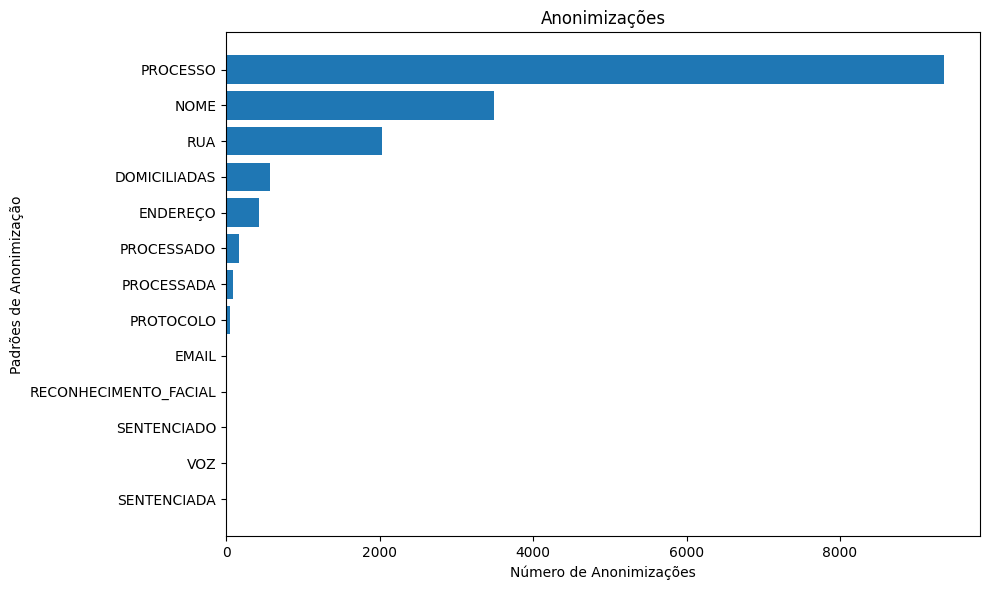

In [ ]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from collections import defaultdict

# Função para limpar e normalizar o texto
def limpar_texto(texto):
    if pd.isna(texto):
        return ''
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    texto = " ".join(texto.lower().split())
    return texto

# Função para anonimizar termos específicos seguidos de nomes ou informações
def anonimizar_texto(texto, anonimizacoes, contadores):
    for padrao, substituto in anonimizacoes.items():
        texto_modificado, num_subs = re.subn(padrao, substituto, texto, flags=re.IGNORECASE)
        contadores[padrao] += num_subs
        texto = texto_modificado
    return texto

# Função para identificar e anonimizar dados sensíveis
def anonimizar_dados_sensiveis(texto, padroes_sensiveis, contadores):
    for padrao, substituto in padroes_sensiveis.items():
        texto_modificado, num_subs = re.subn(padrao, substituto, texto, flags=re.IGNORECASE)
        contadores[padrao] += num_subs
        texto = texto_modificado
    return texto

# Dicionário com os padrões de anonimização
anonimizacoes = {
    r'\bPROCESSO\s+(\S+)': 'PROCESSO',
    r'\bPROCESSO nº\s+(\S+)': 'PROCESSO',
    r'\bPROCESSO Nº\s+(\S+)': 'PROCESSO',
    r'\bPROCESSO Número\s+(\S+)': 'PROCESSO',
    r'\bPROCESSO número\s+(\S+)': 'PROCESSO',
    r'\bPROTOCOLO\s+(\S+)': 'PROTOCOLO',
    r'\bPROTOCOLO nº\s+(\S+)': 'PROTOCOLO',
    r'\bPROTOCOLO Nº\s+(\S+)': 'PROTOCOLO',
    r'\bPROTOCOLO Número\s+(\S+)': 'PROTOCOLO',
    r'\bPROTOCOLO número\s+(\S+)': 'PROTOCOLO',
    r'\bAPENADO\s+(\S+)': 'APENADO',
    r'\bAPENADA\s+(\S+)': 'APENADA',
    r'\bSENTENCIADO\s+(\S+)': 'SENTENCIADO',
    r'\bSENTENCIADA\s+(\S+)': 'SENTENCIADA',
    r'\b[Ll]aura [Pp]ereira da [Ss]ilveira\b': 'NOME',
    r'\bProcessada\s+(\S+)': 'PROCESSADA',
    r'\bprocessado\s+(\S+)': 'PROCESSADO',
    r'\breeducando\s+(\S+)': 'REEDUCANDO',
    r'\breeducanda\s+(\S+)': 'REEDUCANDA',
    r'\bTiago Ordones Rego Bicalho\b': 'NOME',
    r'\bTIAGO ORDONES RÊGO BICALHO\b': 'NOME',
    r'\bRenato Junior Morais Silva Macedo\b': 'NOME',
    r'\bjunior morais silva macedo\b': 'NOME',
    r'\bRenato Junior Moraes Silva Macedo\b': 'NOME',
    r'\bIsalvete Macedo Alves Morais\b': 'NOME',
    r'\bIsalvete Macedo Alves Moraes\b': 'NOME',
    r'\bintimação Ministério Público\b': 'INSTITUIÇÃO',
    r'\bdomiciliada\s+(\S+)': 'ENDEREÇO',
    r'\bRua\s+\S+': 'RUA',
    r'\bEdifício\s+\S+': 'ENDEREÇO',
    r'\bendereços via\s+\S+': 'ENDEREÇO'
}

# Padrões de dados sensíveis para anonimização
padroes_sensiveis = {
    r'\b[Nn]ome\s+\S+': 'NOME',  # Nomes
    r'\bCPF\s+\d+': 'CPF',  # CPF
    r'\bRG\s+\d+': 'RG',  # RG
    r'\bdata de nascimento\b\s+\S+': 'DATA_NASCIMENTO',  # Data de nascimento
    r'\bendereço\b\s+.*': 'ENDEREÇO',  # Endereço
    r'\bendereço\b\s+\S+': 'ENDEREÇO',  # Endereço
    r'\bendereço\b\s+\S+': 'ENDEREÇO',  # Endereço
    r'\btelefone\b\s+\d+': 'TELEFONE',  # Número de telefone
    r'\bemail\b\s+\S+': 'EMAIL',  # E-mail
    r'\bconta bancária\b\s+\d+': 'CONTA_BANCÁRIA',  # Número de conta bancária
    r'\bcartão de crédito\b\s+\d+': 'CARTÃO_CRÉDITO',  # Número de cartão de crédito
    r'\btransações financeiras\b\s+.*': 'TRANSAÇÕES_FINANCEIRAS',  # Informações de transações financeiras
    r'\binformações médicas\b\s+.*': 'INFORMAÇÕES_MÉDICAS',  # Informações médicas
    r'\bhistórico de saúde\b\s+.*': 'HISTÓRICO_SAUDE',  # Histórico de saúde
    r'\bregistros médicos\b\s+.*': 'REGISTROS_MÉDICOS',  # Registros médicos
    r'\bimpressões digitais\b\s+\S+': 'IMPRESSÕES_DIGITAIS',  # Impressões digitais
    r'\breconhecimento facial\b\s+\S+': 'RECONHECIMENTO_FACIAL',  # Reconhecimento facial
    r'\bvoz\b\s+\S+': 'VOZ',  # Voz
    r'\binformações de localização\b\s+.*': 'LOCALIZAÇÃO',  # Dados de localização
    r'\bcookies\b\s+\S+': 'COOKIES',  # Dados de navegação na internet
    r'\binformações genéticas\b\s+\S+': 'INFORMACOES_GENÉTICAS'  # Dados genéticos
}

# Inicializando os contadores
contadores = defaultdict(int)

# Carregar o arquivo CSV
file_path = '/content/Dados-DPE-GO.csv'
data = pd.read_csv(file_path)

# Aplicando limpeza e anonimização ao DataFrame
for i, row in data.iterrows():
    texto_limpo = limpar_texto(row['COLUNA_TEXTO'])
    texto_anonimizado = anonimizar_texto(texto_limpo, anonimizacoes, contadores)
    texto_anonimizado = anonimizar_dados_sensiveis(texto_anonimizado, padroes_sensiveis, contadores)
    data.at[i, 'COLUNA_TEXTO'] = texto_anonimizado

# Filtrando e ordenando os contadores por valor (decrescente)
contadores_filtrados = {padrao: contador for padrao, contador in contadores.items() if contador > 0}
contadores_ordenados = dict(sorted(contadores_filtrados.items(), key=lambda item: item[1], reverse=True))

# Mapeamento de padrões para termos simplificados para o gráfico
mapeamento_para_grafico = {
    r'\bPROCESSO\s+(\S+)': 'PROCESSO',
    r'\bPROCESSO nº\s+(\S+)': 'PROCESSO',
    r'\bPROCESSO Nº\s+(\S+)': 'PROCESSO',
    r'\bPROCESSO Número\s+(\S+)': 'PROCESSO',
    r'\bPROCESSO número\s+(\S+)': 'PROCESSO',
    r'\bPROTOCOLO\s+(\S+)': 'PROTOCOLO',
    r'\bPROTOCOLO nº\s+(\S+)': 'PROTOCOLO',
    r'\bPROTOCOLO Nº\s+(\S+)': 'PROTOCOLO',
    r'\bPROTOCOLO Número\s+(\S+)': 'PROTOCOLO',
    r'\bPROTOCOLO número\s+(\S+)': 'PROTOCOLO',
    r'\bAPENADO\s+(\S+)': 'APENADO',
    r'\bAPENADA\s+(\S+)': 'APENADA',
    r'\bSENTENCIADO\s+(\S+)': 'SENTENCIADO',
    r'\bSENTENCIADA\s+(\S+)': 'SENTENCIADA',
    r'\b[Ll]aura [Pp]ereira da [Ss]ilveira\b': 'NOME',
    r'\bProcessada\s+(\S+)': 'PROCESSADA',
    r'\bprocessado\s+(\S+)': 'PROCESSADO',
    r'\breeducando\s+(\S+)': 'REEDUCANDO',
    r'\breeducanda\s+(\S+)': 'REEDUCANDA',
    r'\bTiago Ordones Rego Bicalho\b': 'NOME',
    r'\bTIAGO ORDONES RÊGO BICALHO\b': 'NOME',
    r'\bRenato Junior Morais Silva Macedo\b': 'NOME',
    r'\bjunior morais silva macedo\b': 'NOME',
    r'\bRenato Junior Moraes Silva Macedo\b': 'NOME',
    r'\bIsalvete Macedo Alves Morais\b': 'NOME',
    r'\bIsalvete Macedo Alves Moraes\b': 'NOME',
    r'\bintimação Ministério Público\b': 'INSTITUIÇÃO',
    r'\bdomiciliada\s+(\S+)': 'DOMICILIADAS',
    r'\bRua\s+\S+': 'RUA',
    r'\bEdifício\s+\S+': 'ENDEREÇO',
    r'\bendereços via\s+\S+': 'ENDEREÇO',
    r'\b[Nn]ome\s+\S+': 'NOME',
    r'\bCPF\s+\d+': 'CPF',
    r'\bRG\s+\d+': 'RG',
    r'\bdata de nascimento\b\s+\S+': 'DATA_NASCIMENTO',
    r'\bendereço\b\s+.*': 'ENDEREÇO',
    r'\btelefone\b\s+\d+': 'TELEFONE',
    r'\bemail\b\s+\S+': 'EMAIL',
    r'\bconta bancária\b\s+\d+': 'CONTA_BANCÁRIA',
    r'\bcartão de crédito\b\s+\d+': 'CARTÃO_CRÉDITO',
    r'\btransações financeiras\b\s+.*': 'TRANSAÇÕES_FINANCEIRAS',
    r'\binformações médicas\b\s+.*': 'INFORMAÇÕES_MÉDICAS',
    r'\bhistórico de saúde\b\s+.*': 'HISTÓRICO_SAUDE',
    r'\bregistros médicos\b\s+.*': 'REGISTROS_MÉDICOS',
    r'\bimpressões digitais\b\s+\S+': 'IMPRESSÕES_DIGITAIS',
    r'\breconhecimento facial\b\s+\S+': 'RECONHECIMENTO_FACIAL',
    r'\bvoz\b\s+\S+': 'VOZ',
    r'\binformações de localização\b\s+.*': 'LOCALIZAÇÃO',
    r'\bcookies\b\s+\S+': 'COOKIES',
    r'\binformações genéticas\b\s+\S+': 'INFORMACOES_GENÉTICAS'
}

# Apresentando a contagem no terminal
for padrao, contador in contadores_ordenados.items():
    termo_simplificado = mapeamento_para_grafico.get(padrao, padrao)
    print(f"{termo_simplificado}: {contador} anonimizações")

# Gerando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
rotulos = [mapeamento_para_grafico.get(padrao, padrao) for padrao in contadores_ordenados.keys()]
valores_grafico = list(contadores_ordenados.values())
plt.barh(rotulos, valores_grafico, align='center')
plt.gca().invert_yaxis()  # Inverte a ordem dos rótulos no eixo y
plt.xlabel('Número de Anonimizações')
plt.ylabel('Padrões de Anonimização')
plt.title('Anonimizações')
plt.tight_layout()
plt.show()

# Salvando o DataFrame anonimizado
data.to_csv('/content/teste/dados_anonimizados.csv', index=False)
data.to_excel('/content/teste/dados_anonimizados.xlsx', index=False)